In [1]:
from typing import List, Optional
import os
import pickle

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns


In [2]:
from pathlib import Path
import pyrootutils

notebook_path = Path(os.path.abspath(""))
pyrootutils.setup_root(notebook_path, indicator=".project-root", pythonpath=True)

DIRNAME = r"/cluster/home/vjimenez/adv_pa_new/results/posteriors/"

In [3]:
with open(r"/cluster/home/vjimenez/adv_pa_new/results/posteriors/CGO_1_hue_0_irm.pkl", "rb") as file:
    posterior_dict = pickle.load(file)

posterior_dict

/cluster/project/jbuhmann/posterior_agreement/.venvs/adv_pa/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'stored_x_mean': tensor([9.9974e-01, 2.6199e-04, 2.8160e-06]),
 'stored_x_std': tensor([8.1814e-03, 8.1784e-03, 7.5645e-05]),
 'stored_xbeta_mean': tensor([0.3333, 0.3333, 0.3333]),
 'stored_xbeta_std': tensor([nan, nan, nan])}

In [4]:
dataset_names = [
    ["ZGO_hue_3", "CGO_1_hue", "CGO_2_hue", "CGO_3_hue", "ZSO_hue_3"],
    ["ZGO_pos_3", "CGO_1_pos", "CGO_2_pos", "CGO_3_pos", "ZSO_pos_3"]
]

dataset_names_parsed = ["ZGO", "1-CGO", "2-CGO", "3-CGO", "ZSO"]

xaxis_names = [
    ["Test 0"],
    ["Test 1", "Test 2", "Test 3", "Test 4", "Test 5"]
]

factor_name = ["Hue", "Position"]

COLORS_DICT = {
    "erm": "tab:blue",
    "irm": "tab:orange",
    "lisa": "tab:green"
}

In [5]:
def plot_posteriors_SOGO(
        savefilename: str,
        save: bool = False,
    ):

    # Get the font
    fontname = "DejaVu Serif"
    _ = fm.findfont(fm.FontProperties(family=fontname))
    fontsize = 22

    for ifactor in range(2):
        for model in ["erm", "irm"]:
            numbars = 5

            _, ax = plt.subplots(figsize=(0.5 * numbars * 3.861, 2 * 2.7291))
            sns.set(font_scale=1.9)
            plt.rcParams["font.family"] = "serif"
            plt.rcParams["font.serif"] = fontname
            sns.set_style("ticks")

            delta, barwidth = 0.175, 0.35
            x_poses = []
            for idataset, ds_name in enumerate(dataset_names[ifactor]):
                pos_x = idataset - idataset*0.2
                x_poses.append(pos_x)

                # with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_{ds_index}_{model}.pkl", "rb") as file:
                with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_0_{model}.pkl", "rb") as file:
                    posterior_dict0 = pickle.load(file)
                with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_1_{model}.pkl", "rb") as file:
                    posterior_dict1 = pickle.load(file)
            
            
                color = COLORS_DICT[model]

                # x_beta_1, y_beta_1, err_beta_1 = [pos_x - delta], [posterior_dict["stored_x_mean"][0].item()], [posterior_dict["stored_x_std"][0].item()]
                x_beta_1, y_beta_1, err_beta_1 = [pos_x - delta], [posterior_dict0["stored_x_mean"][0].item()], [posterior_dict0["stored_x_std"][0].item()]
                h1 = ax.bar(x_beta_1, y_beta_1, width=barwidth, color=color) 
                ax.bar(
                    x = x_beta_1,
                    align = "center",
                    height = y_beta_1,
                    facecolor='none',
                    edgecolor='none',
                    color='black',
                    yerr=[
                        err if y+err <= 1 else 1-y
                        for err, y in zip(err_beta_1, y_beta_1)
                    ],
                    capsize=3
                )
            

                # x_beta_2, y_beta_2, err_beta_2 = [pos_x + delta], [posterior_dict["stored_xbeta_mean"][0].item()], [posterior_dict["stored_xbeta_std"][0].item()]
                x_beta_2, y_beta_2, err_beta_2 = [pos_x + delta], [posterior_dict1["stored_x_mean"][0].item()], [posterior_dict1["stored_x_std"][0].item()]
                ax.bar(x_beta_2, y_beta_2, width=barwidth, color="white") # to hide the lines behiind
                h2 = ax.bar(x_beta_2, y_beta_2, width=barwidth, alpha=0.6, hatch="/", color=color) 
                ax.bar(
                    x = x_beta_2,
                    align = "center",
                    height = y_beta_2,
                    facecolor='none',
                    edgecolor='none',
                    color='black',
                    yerr=np.asarray([
                        [err, err] if y+err <= 1 else [err, 1-y]
                        for err, y in zip(err_beta_2, y_beta_2)
                    ]).T,
                    capsize=3
                )

            # Create a legend
            handles = [
                ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:gray"),
                ax.bar([numbars + 10], [0.5], width=barwidth, alpha=0.6, hatch="/", color="tab:gray") 
            ]
            labels = [
                r"$\mathbf{P}(\hat{y}_0 \mid \mathbf{x}_0^{test})$",
                r"$\mathbf{P}(\hat{y}_1 \mid \mathbf{x}_1^{test})$"
            ]
            ax.legend(
                # title=LABEL_DICT[defense],
                handles = handles,
                labels=labels,
                loc="lower right",
                handlelength=1.5,
                framealpha = 1.0,
                prop={
                    "family": fontname,
                    'size': 14,
                },
            )

            # Finish the plot:
            ax.set_xticks(x_poses)
            ax.set_xticklabels(
                dataset_names_parsed,
                fontname=fontname,
            )
            ax.tick_params(axis="both", which="both", direction="in")
            ax.tick_params(axis='x', length=0) # hide ticks
            # plt.xticks(rotation=45)

            xticks_font = fm.FontProperties(family=fontname)
            for tick in ax.get_xticklabels():
                tick.set_fontproperties(xticks_font)
                tick.set_fontsize(fontsize)

            ax.set_yticks(np.arange(0.0, 1.2, 0.1))
            ax.set_ylim(
                [0.7, 1.02] if ifactor == 0 else [0.8, 1.02]
            )
            ax.set_xlim(-barwidth - delta, (numbars - 1 - 0.2*(numbars - 1)) + delta + barwidth)
            ax.grid(linestyle="--", axis="y")
        
            ax.set_title(rf"{factor_name[ifactor]} — {model.upper()}, $\beta$ = 1", fontname=fontname)            
            ax.set_ylabel(r"Avg. conditional $\mathbf{P}(\hat{y})$", fontname=fontname)
                
            plt.tight_layout()
            if save:
                savepath = os.path.join(DIRNAME, f"{savefilename}_{model}_{factor_name[ifactor].lower()}.pdf")
                plt.savefig(savepath, dpi=300)
                plt.clf()
            else:
                plt.show()
            plt.close()

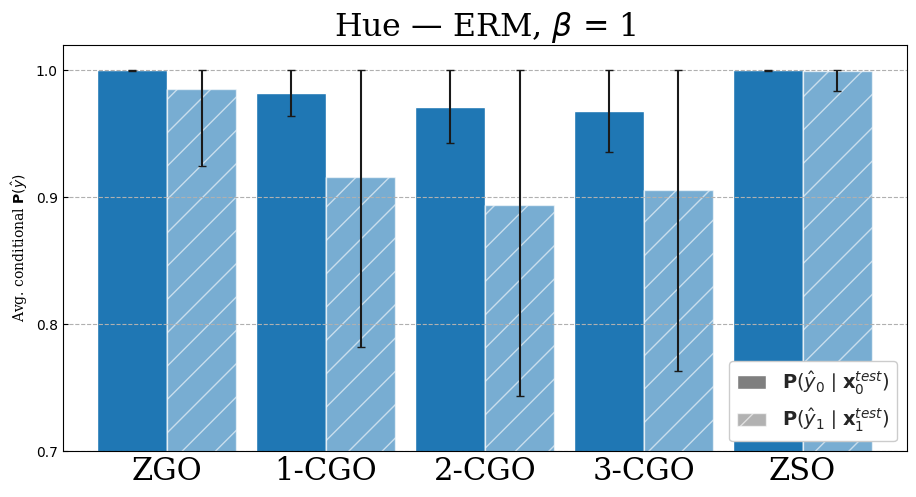

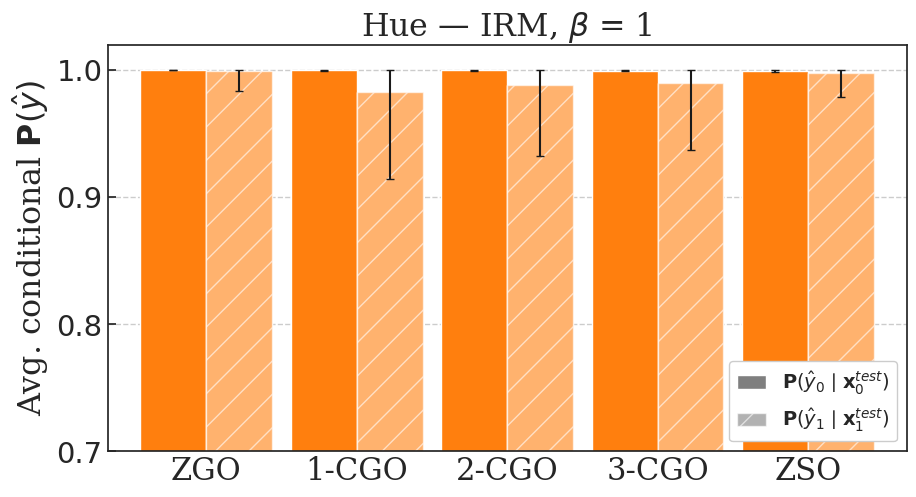

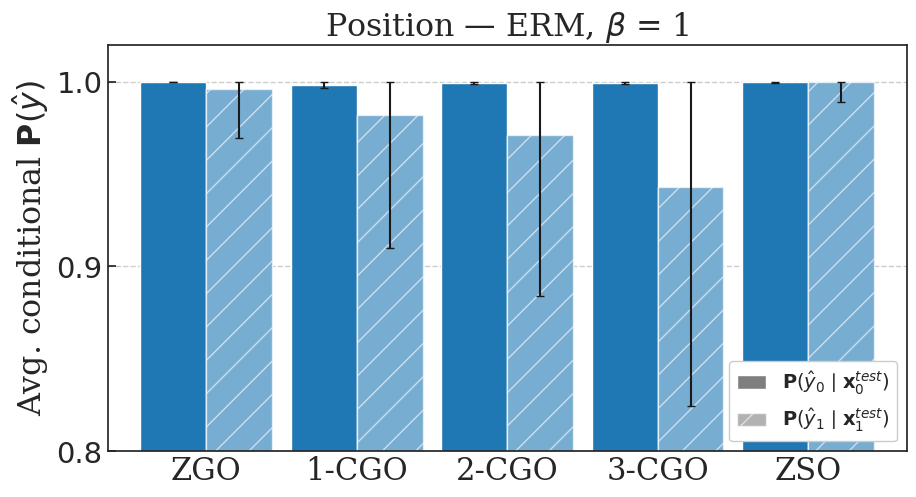

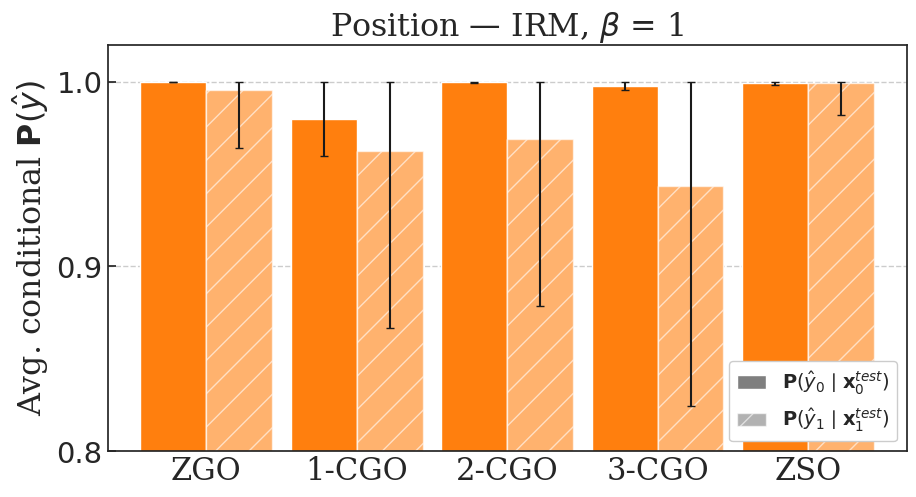

In [6]:
plot_posteriors_SOGO(
        savefilename = "posterior",
        save = False,
    )

In [7]:
def plot_posteriors_paper(
        ds_name: str,
        savefilename: str,
        save: bool = False,
    ):

    # Get the font
    fontname = "DejaVu Serif"
    _ = fm.findfont(fm.FontProperties(family=fontname))
    fontsize = 22

    numbars = 6
    _, ax = plt.subplots(figsize=(0.5 * numbars * 3.861, 2 * 2.7291))
    sns.set(font_scale=1.9)
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = fontname
    sns.set_style("ticks")
    
    for imodel, model in enumerate(["erm", "irm", "lisa"]):
        delta, barwidth = 0.346, 0.34

        x_poses = []
        for idataset in range(1, 6):
            pos_x = idataset + (idataset-1)*0.2
            x_poses.append(pos_x)

            # with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_{ds_index}_{model}.pkl", "rb") as file:
            with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_{idataset}_{model}.pkl", "rb") as file:
                posterior_dict = pickle.load(file)
        
        
            color = COLORS_DICT[model]

            if idataset != 1:
                x_beta_1, y_beta_1, err_beta_1 = [pos_x + (imodel-1)*delta], [posterior_dict["stored_x_mean"][0].item()], [posterior_dict["stored_x_std"][0].item()]
                h1 = ax.bar(x_beta_1, y_beta_1, width=barwidth, color=color) 
                ax.bar(
                    x = x_beta_1,
                    align = "center",
                    height = y_beta_1,
                    facecolor='none',
                    edgecolor='none',
                    color='black',
                    yerr=[
                        err if y+err <= 1 else 1-y
                        for err, y in zip(err_beta_1, y_beta_1)
                    ],
                    capsize=3
                )

            else:
                x_beta_2, y_beta_2, err_beta_2 = [pos_x + (imodel-1)*delta], [posterior_dict["stored_x_mean"][0].item()], [posterior_dict["stored_x_std"][0].item()]
                ax.bar(x_beta_2, y_beta_2, width=barwidth, color="white") # to hide the lines behiind
                h2 = ax.bar(x_beta_2, y_beta_2, width=barwidth, alpha=0.6, hatch="/", color=color) 
                ax.bar(
                    x = x_beta_2,
                    align = "center",
                    height = y_beta_2,
                    facecolor='none',
                    edgecolor='none',
                    color='black',
                    yerr=np.asarray([
                        [err, err] if y+err <= 1 else [err, 1-y]
                        for err, y in zip(err_beta_2, y_beta_2)
                    ]).T,
                    capsize=3
                )

    # Create a legend
    handles = [
        ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:blue"),
        ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:orange"),
        ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:green"),
    ]
    labels = ["Vanilla ERM", "Arjovsky et al.", "Yao et al."]
    ax.legend(
        # title=LABEL_DICT[defense],
        handles = handles,
        labels=labels,
        loc="lower left",
        handlelength=1.5,
        framealpha = 1.0,
        prop={
            "family": fontname,
            'size': 14,
        },
    )

    # Finish the plot:
    ax.set_xticks(x_poses)
    ax.set_xticklabels(
        [str(i) for i in range(1,6)],
        # fontsize=fontname
    )
    ax.tick_params(axis="both", which="both", direction="in")
    ax.tick_params(axis='x', length=0) # hide ticks
    ax.set_xlabel("# Shift Factors", fontname=fontname)
    # plt.xticks(rotation=45)

    xticks_font = fm.FontProperties(family=fontname)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(xticks_font)
        tick.set_fontsize(fontsize)

    ax.set_yticks(np.arange(0.0, 1.2, 0.02))
    ax.set_ylim(0.918, 1.005)
    # ax.set_ylim(
    #     [0.7, 1.02] if ifactor == 0 else [0.8, 1.02]
    # )
    ax.set_xlim(0.3,6.5)
    ax.grid(linestyle="--", axis="y")

    ax.set_title(rf"(5a) Average Prediction Probability", fontname=fontname)            
    ax.set_ylabel(r"Avg. $\mathbf{P}(\hat{y} \mid x_j^{test})$", fontname=fontname)
        
    plt.tight_layout()
    if save:
        savepath = os.path.join(DIRNAME, f"{savefilename}_{ds_name}.pdf")
        plt.savefig(savepath, dpi=300)
        plt.clf()
    else:
        plt.show()
    plt.close()

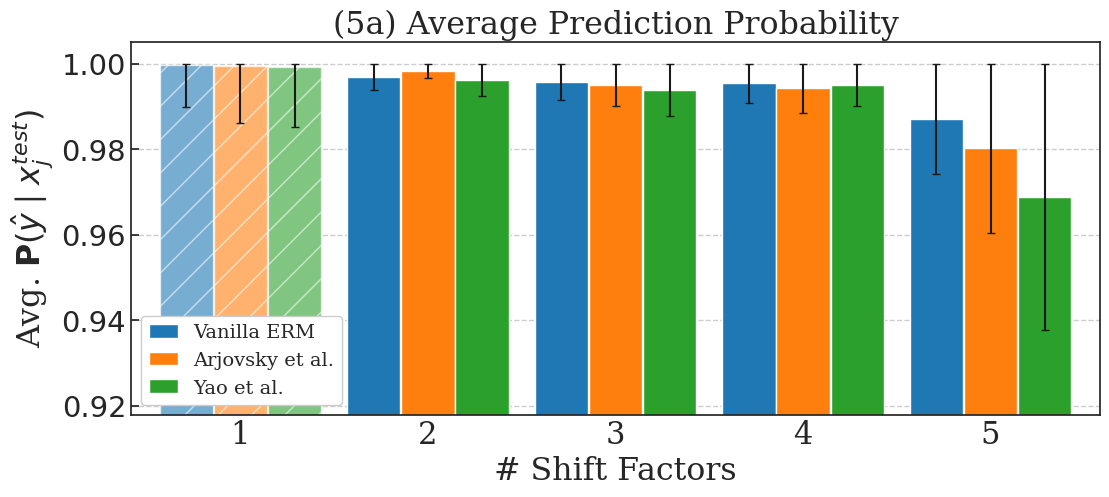

In [8]:
plot_posteriors_paper(
        ds_name = "paper_nonpaired",
        savefilename = "posterior",
        save = False,
)

In [9]:
def plot_posteriors_paper2(
        ds_name: str,
        appendix: str,
        savefilename: str,
        save: bool = False,
    ):

    # Get the font
    fontname = "DejaVu Serif"
    _ = fm.findfont(fm.FontProperties(family=fontname))
    fontsize = 22

    numbars = 6
    _, ax = plt.subplots(figsize=(0.5 * numbars * 3.861, 2 * 2.7291))
    sns.set(font_scale=1.9)
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = fontname
    sns.set_style("ticks")
    
    for imodel, model in enumerate(["erm", "irm", "lisa"]):
        delta, barwidth = 0.346, 0.34

        x_poses = []
        for idataset in range(1, 6):
            pos_x = idataset + (idataset-1)*0.2
            x_poses.append(pos_x)

            # with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_{ds_index}_{model}.pkl", "rb") as file:
            with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_{idataset}_{model}.pkl", "rb") as file:
                posterior_dict = pickle.load(file)
        
        
            color = COLORS_DICT[model]

            x_beta_1, y_beta_1, err_beta_1 = [pos_x + (imodel-1)*delta], [posterior_dict["stored_x_mean"][0].item()], [posterior_dict["stored_x_std"][0].item()]
            h1 = ax.bar(x_beta_1, y_beta_1, width=barwidth, color=color)
            ax.bar(
                x = x_beta_1,
                align = "center",
                height = y_beta_1,
                facecolor='none',
                edgecolor='none',
                color='black',
                yerr=[
                    err if y+err <= 1 else 1-y
                    for err, y in zip(err_beta_1, y_beta_1)
                ],
                capsize=3
            )

    # Create a legend
    handles = [
        ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:blue"),
        ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:orange"),
        ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:green"),
    ]
    labels = ["Vanilla ERM", "Arjovsky et al.", "Yao et al."]
    ax.legend(
        # title=LABEL_DICT[defense],
        handles = handles,
        labels=labels,
        loc="lower left",
        handlelength=1.5,
        framealpha = 1.0,
        prop={
            "family": fontname,
            'size': 14,
        },
    )

    # Finish the plot:
    ax.set_xticks(x_poses)
    ax.set_xticklabels(
        [str(i) for i in range(1,6)],
        # fontsize=fontname
    )
    ax.tick_params(axis="both", which="both", direction="in")
    ax.tick_params(axis='x', length=0) # hide ticks
    ax.set_xlabel("# Shift Factors", fontname=fontname)
    # plt.xticks(rotation=45)

    xticks_font = fm.FontProperties(family=fontname)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(xticks_font)
        tick.set_fontsize(fontsize)

    ax.set_yticks(np.arange(0.0, 1.2, 0.02))
    ax.set_ylim(0.918, 1.005)
    # ax.set_ylim(
    #     [0.7, 1.02] if ifactor == 0 else [0.8, 1.02]
    # )
    ax.set_xlim(0.3,6.5)
    ax.grid(linestyle="--", axis="y")

    ax.set_title(rf"Shift Ratio = 1.0000", fontname=fontname)            
    ax.set_ylabel(r"Avg. predictive confidence", fontname=fontname)
        
    plt.tight_layout()
    if save:
        savepath = os.path.join(DIRNAME, f"{savefilename}_{ds_name}_{appendix}.pdf")
        plt.savefig(savepath, dpi=300)
        plt.clf()
    else:
        plt.show()
    plt.close()

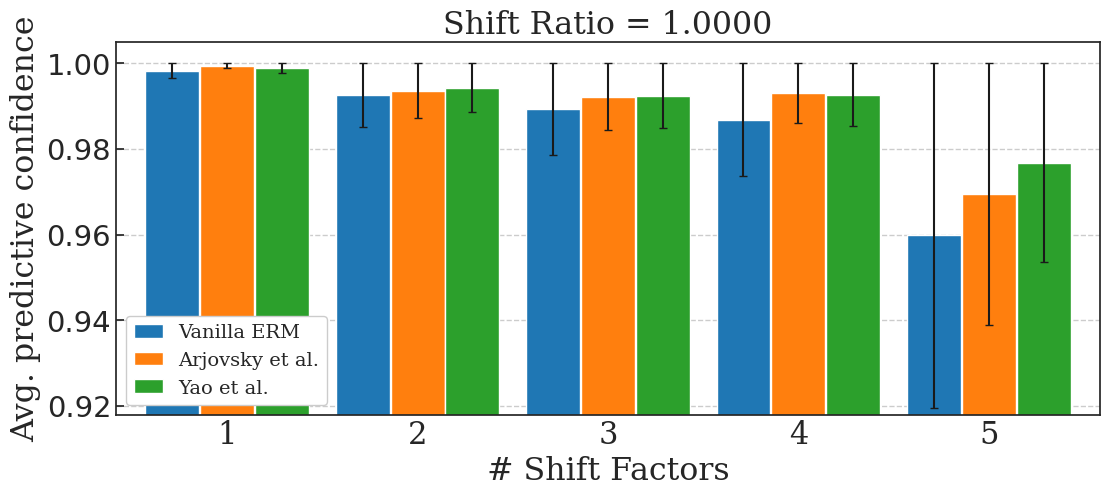

In [10]:
plot_posteriors_paper2(
        ds_name = "paper",
        appendix="paper",
        savefilename = "posterior",
        save = False,
)

# SELECT TRIOS

In [92]:
def plot_posteriors_paper3(
        ds_name: str,
        shifted:int,
        appendix: str,
        savefilename: str,
        save: bool = False,
    ):

    # Get the font
    fontname = "DejaVu Serif"
    _ = fm.findfont(fm.FontProperties(family=fontname))
    fontsize = 22

    numbars=3
    _, ax = plt.subplots(figsize=(0.5 * numbars * 3.861, 2 * 2.7291))
    sns.set(font_scale=1.9)
    plt.rcParams["font.family"] = "serif"
    plt.rcParams["font.serif"] = fontname
    sns.set_style("ticks")
    
    barwidth = 0.35
    delta = 0.175
    x_poses = []
    for imodel, model in enumerate(["erm", "irm", "lisa"]):
        for idat, idataset in enumerate([0,shifted]):
            pos_x = imodel - imodel*0.2
    
            # with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_{ds_index}_{model}.pkl", "rb") as file:
            with open(rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/{ds_name}_{idataset}_{model}.pkl", "rb") as file:
                posterior_dict = pickle.load(file)
        
            color = COLORS_DICT[model]

            x_pos = pos_x - delta*(-1)**idat
            x_poses.append(x_pos)
            x_beta_1, y_beta_1, err_beta_1 = [pos_x - delta*(-1)**idat], [posterior_dict["stored_x_mean"][0].item()], [posterior_dict["stored_x_std"][0].item()]
            h1 = ax.bar(x_beta_1, y_beta_1, width=barwidth, color=color)# if idataset < 2 else ax.bar(x_beta_1, y_beta_1, alpha=0.6, hatch="/", width=barwidth, color=color)
            ax.bar(
                x = x_beta_1,
                align = "center",
                height = y_beta_1,
                facecolor='none',
                edgecolor='none',
                color='black',
                yerr=[
                    err if y+err <= 1 else 1-y
                    for err, y in zip(err_beta_1, y_beta_1)
                ],
                capsize=3
            )

    # Create a legend
    handles = [
        ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:blue"),
        ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:orange"),
        ax.bar([numbars + 10], [0.5], width=barwidth, color="tab:green"),
    ]
    labels = ["Vanilla ERM", "Arjovsky et al.", "Yao et al."]
    ax.legend(
        # title=LABEL_DICT[defense],
        handles = handles,
        labels=labels,
        loc="lower left",
        handlelength=1.5,
        framealpha = 1.0,
        prop={
            "family": fontname,
            'size': 14,
        },
    )

    # Finish the plot:
    ax.set_xticks(x_poses)
    ax.set_xticklabels(
        [0,shifted,0,shifted,0,shifted],
        # fontsize=fontname
    )
    ax.tick_params(axis="both", which="both", direction="in")
    ax.tick_params(axis='x', length=0) # hide ticks
    ax.set_xlabel("# Shift Factors", fontname=fontname)
    # plt.xticks(rotation=45)

    xticks_font = fm.FontProperties(family=fontname)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(xticks_font)
        tick.set_fontsize(fontsize)

    ax.set_yticks(np.arange(0.0, 1.2, 0.02))
    ax.set_ylim(0.918, 1.005)
    # ax.set_ylim(
    #     [0.7, 1.02] if ifactor == 0 else [0.8, 1.02]
    # )
    # ax.set_xlim(-0.5, 2.5)
    ax.set_xlim(-barwidth - delta, (numbars - 1 - 0.2*(numbars - 1)) + delta + barwidth)
    ax.grid(linestyle="--", axis="y")

    ax.set_title(rf"Shift Ratio = 1.0000", fontname=fontname)            
    ax.set_ylabel(r"Avg. predictive confidence", fontname=fontname)
        
    plt.tight_layout()
    if save:
        savepath = os.path.join(DIRNAME, f"{savefilename}_{ds_name}_{appendix}.pdf")
        plt.savefig(savepath, dpi=300)
        plt.clf()
    else:
        plt.show()
    plt.close()

In [97]:
plot_posteriors_paper3(
        ds_name = "paper",
        shifted=5,
        appendix="sf=5_paper_three",
        savefilename = "posterior",
        save = True,
)

# KENDALL TABLES

In [60]:
def load_kendall_df():
    kendall_paper = pd.read_csv(r"/cluster/home/vjimenez/adv_pa_new/results/dg/datashift/paper_nonpaired/kendall.csv")
    kendall_paper['shift_factor'] = kendall_paper['shift_factor'].astype(int)
    kendall_paper['shift_ratio'] = kendall_paper['shift_ratio'].astype(float)
    kendall_paper['rank'] = kendall_paper['rank'].astype(int)
    kendall_paper['rank_plot'] = 3 - kendall_paper['rank']
    return kendall_paper

kendall_paper = load_kendall_df()
kendall_paper

,model,shift_ratio,shift_factor,rank,criterion,rank_plot
0,erm,0.1,1,1,pa,2
1,erm,0.1,2,3,pa,0
2,erm,0.1,3,3,pa,0
3,erm,0.1,4,3,pa,0
4,erm,0.1,5,3,pa,0
...,...,...,...,...,...,...
445,lisa,1.0,1,1,afrt,2
446,lisa,1.0,2,1,afrt,2
447,lisa,1.0,3,1,afrt,2
448,lisa,1.0,4,1,afrt,2


In [33]:
# TO CHECK:

# for sr in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
#     df_plot = kendall_paper.loc[
#         (kendall_paper['shift_ratio'] == sr) & (kendall_paper['criterion'] == 'afrt')
#     ]

#     sns.lineplot(
#         data=df_plot,
#         x='shift_factor',
#         y='rank_plot',
#         hue='model',
#         palette=COLORS_DICT,
#         legend=False
#     )
#     plt.show()

In [6]:
import itertools
from scipy.stats import kendalltau

def pairwise_kendall_tau(df, epsilon = None):
    tau_dict = {}
    for metric in ["pa", "afrt", "afrp"]:
        bigtau = 0.0
        ar_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
        pairwise_combinations = list(itertools.combinations(ar_list, 2))
        for i, j in pairwise_combinations:
            df_tau0 = df.loc[
                (df["shift_ratio"] == i) & (df['criterion'] == metric),
                [
                    "model",
                    "rank",
                ]
            ]
            df_tau1 = df.loc[
                (df["shift_ratio"] == j) & (df['criterion'] == metric),
                [
                    "model",
                    "rank",
                ]
            ]

            tau, _ = kendalltau(
                np.argsort(np.asarray(df_tau0['rank'])),
                np.argsort(np.asarray(df_tau1['rank']))
            )
            bigtau += tau

        # Mean kendall tau
        tau_dict[metric] = bigtau/len(pairwise_combinations)

    return tau_dict

In [7]:
def one_neighbour_combinations(my_list):
    result = []
    
    for i in range(len(my_list)):
        neighbors = []
        if i > 0:
            neighbors.append((my_list[i], my_list[i-1]))
        if i < len(my_list) - 1:
            neighbors.append((my_list[i], my_list[i+1]))
        result.append(neighbors)
    return result

def neighbourwise_kendall_tau(df):
    tau_dict = {}
    for metric in ["pa", "afrt", "afrp"]:
        bigtau = 0.0
        ar_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
        neighbour_combinations = one_neighbour_combinations(ar_list)
        for neighbour in neighbour_combinations:
            smalltau = 0.0
            for i, j in neighbour:
                df_tau0 = df.loc[
                    (df["shift_ratio"] == i) & (df['criterion'] == metric),
                    [
                        "model",
                        "rank",
                    ]
                ]
                df_tau1 = df.loc[
                    (df["shift_ratio"] == j) & (df['criterion'] == metric),
                    [
                        "model",
                        "rank",
                    ]
                ]

                tau, _ = kendalltau(
                    np.argsort(np.asarray(df_tau0['rank'])),
                    np.argsort(np.asarray(df_tau1['rank']))
                )
                smalltau += tau
            bigtau += smalltau/len(neighbour)

        # Mean kendall tau
        tau_dict[metric] = bigtau/len(neighbour_combinations)

    return tau_dict

In [75]:
def maximum_kendall_tau(df):
    tau_dict = {}
    ar_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    for metric in ["pa", "afrt", "afrp"]:
        df_tau0 = df.loc[
            (df["shift_ratio"] == 1.0) & (df['criterion'] == metric),
            [
                "model",
                "rank",
            ]
        ]
                

        all_tau = []
        for shift_ratio in ar_list:
            df_tau1 = df.loc[
                (df["shift_ratio"] == shift_ratio) & (df['criterion'] == metric),
                [
                    "model",
                    "rank",
                ]
            ]

            tau, _ = kendalltau(
                np.argsort(np.asarray(df_tau0['rank'])),
                np.argsort(np.asarray(df_tau1['rank']))
            )
            all_tau.append(tau)

        # Mean kendall tau
        tau_dict[metric] = np.argmax(all_tau)
    return tau_dict

## Many to many

For every `shift_factor`, we compute the average many-to-many kendall for the three models.

In [70]:
for shift_factor in [1,2,3,4,5]:
    df = kendall_paper.loc[
        (kendall_paper['shift_factor'] == shift_factor),
    ].copy()
    df.loc[:, 'model_sorted'] = pd.Categorical(df['model'], categories=['erm', 'irm', 'lisa'], ordered=True)
    df = df.sort_values(by='model_sorted')
    tau_dict = pairwise_kendall_tau(df)

    print(f"Shift factor: {shift_factor}, {tau_dict}")

Shift factor: 1, {'pa': 1.0, 'afrt': 1.0, 'afrp': -0.1111111111111111}
Shift factor: 2, {'pa': 0.7629629629629628, 'afrt': 1.0, 'afrp': 0.7629629629629628}
Shift factor: 3, {'pa': 1.0, 'afrt': 1.0, 'afrp': 1.0}
Shift factor: 4, {'pa': 1.0, 'afrt': 1.0, 'afrp': 1.0}
Shift factor: 5, {'pa': 1.0, 'afrt': 1.0, 'afrp': 1.0}


## Neighbour-wise

In [73]:
for shift_factor in [1,2,3,4,5]:
    df = kendall_paper.loc[
        (kendall_paper['shift_factor'] == shift_factor),
    ].copy()
    df.loc[:, 'model_sorted'] = pd.Categorical(df['model'], categories=['erm', 'irm', 'lisa'], ordered=True)
    df = df.sort_values(by='model_sorted')
    tau_dict = neighbourwise_kendall_tau(df)

    print(f"Shift factor: {shift_factor}, {tau_dict}")

Shift factor: 1, {'pa': 1.0, 'afrt': 1.0, 'afrp': 0.8}
Shift factor: 2, {'pa': 0.9333333333333333, 'afrt': 1.0, 'afrp': 0.9333333333333333}
Shift factor: 3, {'pa': 1.0, 'afrt': 1.0, 'afrp': 1.0}
Shift factor: 4, {'pa': 1.0, 'afrt': 1.0, 'afrp': 1.0}
Shift factor: 5, {'pa': 1.0, 'afrt': 1.0, 'afrp': 1.0}


## Maximum Kendall

In [76]:
for shift_factor in [1,2,3,4,5]:
    df = kendall_paper.loc[
        (kendall_paper['shift_factor'] == shift_factor),
    ].copy()
    df.loc[:, 'model_sorted'] = pd.Categorical(df['model'], categories=['erm', 'irm', 'lisa'], ordered=True)
    df = df.sort_values(by='model_sorted')
    tau_dict = maximum_kendall_tau(df)

    print(f"Shift factor: {shift_factor}, {tau_dict}")

Shift factor: 1, {'pa': 0, 'afrt': 0, 'afrp': 5}
Shift factor: 2, {'pa': 2, 'afrt': 0, 'afrp': 2}
Shift factor: 3, {'pa': 0, 'afrt': 0, 'afrp': 0}
Shift factor: 4, {'pa': 0, 'afrt': 0, 'afrp': 0}
Shift factor: 5, {'pa': 0, 'afrt': 0, 'afrp': 0}


# VIOLIN POSTERIORS

In [49]:
def get_violin_df():

    probs = []
    list_models = ['erm', 'irm', 'lisa']
    list_shift_factor = [0,1,2,3,4,5]
    for model in list_models:
            for shift_factor in list_shift_factor:
                pkl_file = rf"/cluster/home/vjimenez/adv_pa_new/results/posteriors/paper_nonpaired_{shift_factor}_{model}_histogram.pkl"
                with open(pkl_file, "rb") as f:
                    posteriors_dict = pickle.load(f)
                    
                probs.extend([
                    posteriors_dict['stored_x'][:,0].flatten().clip(0.0, 1.0),
                    posteriors_dict['stored_x_gibbs'][:,0].flatten().clip(0.0, 1.0),
                ])

    df = pd.DataFrame({
        'probability': np.concatenate(probs),
        'model': [
            list_models[p//12]
            for p, prob in enumerate(probs)
            for _ in range(len(prob))
        ],
        'beta': [
            r"$\beta = 1$" if p%2 == 0 else r"$\beta = \beta^*$"
            for p, prob in enumerate(probs)
            for _ in range(len(prob))
            
        ],
        'shift_factor': [
            list_shift_factor[p%len(list_shift_factor)]
            for p, prob in enumerate(probs)
            for _ in range(len(prob))
        ]
    })

    return df

In [68]:
import matplotlib.patches as patches

def beta_violin(
        df_plot,
        savedir: str,
        save: bool = False
    ):

    # for shift_factor in [0,1,2,3,4,5]:
    for shift_factor in [5]:
        fontname = "DejaVu Serif"
        _ = fm.findfont(fm.FontProperties(family=fontname))

        # Create a line plot for PGD attack type with Seaborn
        # _, ax = plt.subplots(figsize=(1.2 * 3.861, 2 * 2.7291))
        _, ax = plt.subplots(figsize=(2.5 * 3.861, 2 * 2.7291))
        sns.set(font_scale=1.9)
        plt.rcParams["font.family"] = "serif"
        plt.rcParams["font.serif"] = fontname
        sns.set_style("ticks")

        for imod, model in enumerate(['erm', 'irm', 'lisa']):
            df_plot_i = df_plot[
                (df_plot['model'] == model) & (df_plot['shift_factor'] == shift_factor) & (df['probability'] != 1.0) # ALERT
            ].copy()
            df_plot_i["index"] = float(imod)
            # CUSTOM_PALETTE = {
            #     "stored_x": COLORS_DICT[model],
            #     "stored_x_gibbs": COLORS_DICT[model]
            # }
            CUSTOM_PALETTE = {
                r"$\beta = 1$": COLORS_DICT[model],
                r"$\beta = \beta^*$": COLORS_DICT[model]
            }
            sns.violinplot(
                ax=ax,
                native_scale=True,
                x=df_plot_i["index"],
                y=df_plot_i['probability'],
                hue=df_plot_i['beta'],
                # data=df_plot_i,
                split=True,
                density_norm='width', #'width',
                linewidth=0,
                palette=CUSTOM_PALETTE,
                alpha=1,
                legend=False,

                # Parameters of KDE
                bw_adjust=0.001,
                # bw_method='scott',
                cut=0,
            )

            # Overlay the mean and std
            # means = df_plot_i.groupby(['subset'])['probability'].mean().reset_index()
            # stds = df_plot_i.groupby(['subset'])['probability'].std().reset_index()
            # for i, subset in enumerate(df_plot_i['subset'].unique()):
            #     # Get the mean and std for this combination of subset and beta
            #     mean_val = means.loc[(means['subset'] == subset), 'probability'].values[0].clip(0.0, 1.0)
            #     std_val = stds.loc[(stds['subset'] == subset), 'probability'].values[0]

            #     x_pos = idef - ((-1)**i)*0.15
            #     ax.scatter(x_pos, mean_val, color='black', marker='o', s=30, zorder=3)
            #     ax.errorbar(
            #         x_pos,
            #         mean_val,
            #         # yerr=std_val,
            #         yerr=np.asarray([
            #             [std_val, std_val] if mean_val+std_val <= 1 else [std_val, 1-mean_val]
            #         ]).T,
            #         fmt='none',
            #         ecolor='black',
            #         capsize=3,
            #     )

        # Overlay hatching for beta=0 (right side)
        # for icol, collection in enumerate(ax.collections): 
        #     if icol in [1, 5, 7,11,13,17,19,21,23,25,27,29,31,33]:
        #         collection.set_alpha(0.6)
        #         for path in collection.get_paths():
        #             hatch_patch = patches.PathPatch(
        #                 path, hatch="/", facecolor='none', lw=0,
        #                 edgecolor="white", alpha=0.6
        #             )
        #             ax.add_patch(hatch_patch)

                
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_ylim(0.98, 1.05)
        ax.set_ylabel(r"Conditional $\mathbf{P}(\hat{y})$", fontname=fontname)
        ax.set_xlabel(None)
        ax.set_title(r"PGD, AR = 1, $\ell_\infty$ = 32 / 255", fontname=fontname)
        # ax.set_title(r"FMN, AR = 0.5", fontname=fontname)

        ax.tick_params(axis="both", which="both", direction="in")
        # plt.xticks(rotation=45)
        xticks_font = fm.FontProperties(family=fontname)
        for tick in ax.get_xticklabels():
            tick.set_fontproperties(xticks_font)
            tick.set_fontsize(16)

        ax.grid(linestyle="--")

        plt.tight_layout()
        if save:
            fname = os.path.join(
                savedir, 
                f"foo_sf={shift_factor}" + ".pdf"
                # f"{defense}_violin_FMN_ar=0.5_beta" + ".pdf"
            )
            plt.savefig(fname, dpi=300)
            plt.clf()
        else:
            plt.show()
        plt.close()

In [45]:
df = get_violin_df()
df

,probability,model,beta,shift_factor
0,1.0,erm,$\beta = 1$,0
1,1.0,erm,$\beta = 1$,0
2,1.0,erm,$\beta = 1$,0
3,1.0,erm,$\beta = 1$,0
4,1.0,erm,$\beta = 1$,0
...,...,...,...,...
1437691,1.0,lisa,$\beta = \beta^*$,5
1437692,1.0,lisa,$\beta = \beta^*$,5
1437693,1.0,lisa,$\beta = \beta^*$,5
1437694,1.0,lisa,$\beta = \beta^*$,5


In [48]:
df.loc[
    (df['probability'] != 1.0)
]#.count()

,probability,model,beta,shift_factor
112,0.999991,erm,$\beta = 1$,0
398,0.999990,erm,$\beta = 1$,0
540,1.000000,erm,$\beta = 1$,0
551,1.000000,erm,$\beta = 1$,0
795,1.000000,erm,$\beta = 1$,0
...,...,...,...,...
1437672,0.999969,lisa,$\beta = \beta^*$,5
1437677,0.559630,lisa,$\beta = \beta^*$,5
1437679,0.999998,lisa,$\beta = \beta^*$,5
1437685,0.999999,lisa,$\beta = \beta^*$,5


In [47]:
df_new = df.loc[
    # (df['shift_factor'] == 4) & (df['model'] == 'erm') & (df['beta'] == r"$\beta = 1$")

    (df['shift_factor'] == 5) & (df['model'] == 'erm') & (df['beta'] == r"$\beta = \beta^*$")

].copy()

df_new.loc[
    (df_new['probability'] == 1.0)
].count()

probability     72304
model           72304
beta            72304
shift_factor    72304
dtype: int64

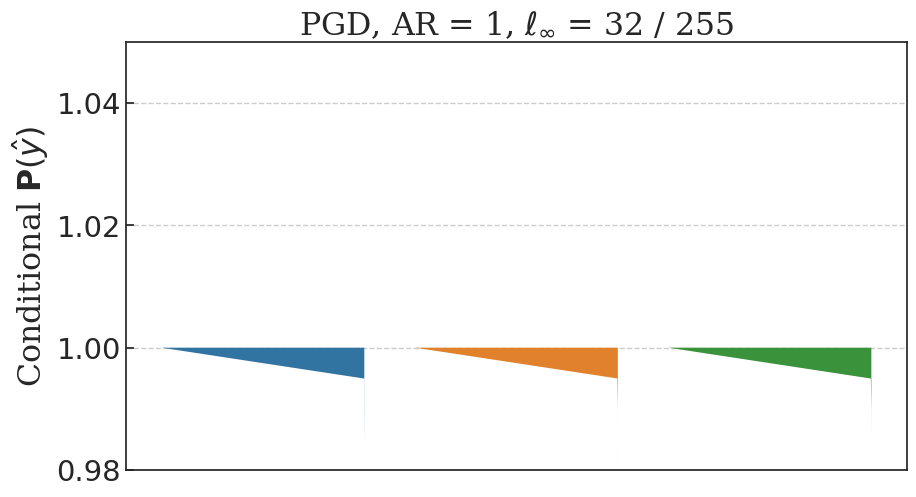

In [69]:
beta_violin(
    df_plot=df,
    savedir="foo",
    save=False
)